In [9]:
import shapefile
from collections import Counter

In [25]:
!pwd

/home/marcel/Github/GeoSpatial-Classification/Un-used_codes


In [26]:
sf = shapefile.Reader('/home/marcel/Github/GeoSpatial-Classification/Crops_2016/2016_Crops.dbf')

In [27]:
shapes = sf.shapes()

In [28]:
fields =sf.fields

In [29]:
records = sf.records()

In [30]:
totalcropfields = [records[i][-5] for i in range(len(records))]

In [31]:
import re
try:
    m = re.search('^([^,]+),',totalcropfields[397])
except:
    m.group(0)

In [32]:
q= re.search('.*',totalcropfields[1])
a = []

In [33]:
finalcrops = []
for i in range(len(totalcropfields)):
    m = re.search('^([^,]+)[^,]',totalcropfields[i])
    if m is None:
        m = re.search('.*',totalcropfields[i])
    finalcrops.append(m.group(0))
    if m is None:
        finalcrops.append('')
for i in range(len(finalcrops)):
    finalcrops[i] = re.sub('ORG ','',finalcrops[i])
for i in range(len(finalcrops)):
    finalcrops[i] = re.sub(' FOR/FOD','',finalcrops[i])

In [34]:
construct = Counter(finalcrops)

In [35]:
keys = construct.keys()

In [36]:
import pandas as pd
cropList = construct
cropFamily = pd.DataFrame.from_dict(cropList, orient='index').reset_index()
cropFamily.columns = 'Crop','Count'
cropNames = cropFamily['Crop']
genus = ['Avena','Medicago','Carthamus','Triticum','Vitis','Prunus','Juglans','NaN','Fumigate','Solanum','Helianthus','Prunus',
        'NaN','Prunus','Prunus','Malus','NaN','Graze','Graze','Citrus','Olea','Pistacia','Prunus','Cucurbita','Ficus',
        'Solanum','NaN','Oryza','NaN','Pyrus','Beehive','Fumigate','NaN','Allium','Glycine','Zea','Cucurbita','Cucumis',
        'Turf','Castanea','Graze','Turf','Lolium','Flowering','Cucumis','Asparagus','Allium','Industrial','Hay','Carya','NaN',
        'NaN','Ocimum','Ocimum','Solanum','Citrus','Bean','Flowering','Vaccinium','Avena','Triticum','Sorghum','Tree',
        'Zea','Turf','GrnHouse Transplanting','GrnHouse Transplanting','Allium','Helianthus','Poaceae','Taraxacum',
        'NaN','NaN','NaN','Phaseolus','Cucumis','Carthamus','Prunus','Cucumis','Diospyros','NaN','Prunus','Hordeum',
        'Brassica','Daucus','Allium','Allium','Dennettia','Carya','Daucus','Brassica','Ditch','Citrullus','Cucurbita',
        'Triticum','Coriandrum','NaN','Lactuca','Prunus','Capsicum','Allium','Lactuca','Brassica','Brassica','Phaseolus',
        'Brassica','Punica','Lolium','Fumigate','Dactylis','Medicago','Cucumis','Punica','Actinidia','Sorghum','Zea',
        'Rosa','Beta','NaN','Solanum','NaN','Fragaria','NaN','Rubus','Solanum','NaN','Capsicum','Humulus','Secale',
        'Cicer','Sorghum','Vitis','Zizania','Citrullus','Cannabis','Vicia','Cucurbita','Cucumis','Cucurbita','Cucurbita','Cucurbita']
cropGenus = pd.DataFrame(cropFamily,genus)
#cropGenus.columns = 'Crop','Genus'
cropFamily['Genus'] = genus

In [37]:
values = []
for crop in cropNames:
    values.append(crop)
len(values)

141

In [47]:
cropFamily.loc[12, "Crop"] = "Unknown"

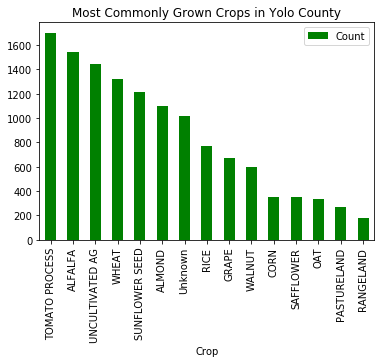

In [58]:
%matplotlib inline
cropFamily.sort_values(ascending = False, by = 'Count')[:15].plot.bar(x = 'Crop',color = 'green',title = 'Most Commonly Grown Crops in Yolo County')
